## XGBoost 회귀예측

In [119]:
# 라이브러리 로드
from xgboost import XGBRegressor
from xgboost import plot_importance, plot_tree


from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import matplotlib.pyplot as plt
import pandas as pd
import xgboost as xgb ## XGBoost 불러오기
import numpy as np

In [90]:
df = pd.read_csv('./Standard_Poly.csv', encoding='utf-8')
df

,일시,0,1,2,3,4,5,6,7,8,...,13,14,15,16,17,18,19,20,특보강도,남은시간
0,2011-03-04 17:00:00,1.0,-0.749586,-0.305482,-0.190499,-0.133477,0.833644,0.561880,0.228985,0.142796,...,0.040775,-0.254663,0.036290,0.025427,-0.158808,0.017816,-0.111273,0.694962,0.0,0.0
1,2011-03-04 18:00:00,1.0,-0.501069,-0.305482,-0.190499,-0.337530,0.927665,0.251070,0.153068,0.095453,...,0.103109,-0.283385,0.036290,0.064299,-0.176719,0.113926,-0.313115,0.860562,0.0,0.0
2,2011-03-04 19:00:00,1.0,-0.045454,-0.305482,-0.190499,-0.337530,0.994823,0.002066,0.013885,0.008659,...,0.103109,-0.303901,0.036290,0.064299,-0.189513,0.113926,-0.335782,0.989672,0.0,0.0
3,2011-03-04 20:00:00,1.0,-0.708167,-0.305482,-0.190499,-0.133477,1.048549,0.501500,0.216332,0.134905,...,0.040775,-0.320313,0.036290,0.025427,-0.199748,0.017816,-0.139957,1.099455,0.0,0.0
4,2011-03-04 21:00:00,1.0,-0.335391,-0.305482,-0.190499,-0.133477,1.115707,0.112487,0.102456,0.063892,...,0.040775,-0.340829,0.036290,0.025427,-0.212541,0.017816,-0.148921,1.244802,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72644,2018-10-06 06:00:00,1.0,3.723723,2.767710,7.426535,7.212417,-2.201888,13.866116,10.306186,27.654363,...,19.961880,-6.094186,55.153429,53.563274,-16.352396,52.018965,-15.880932,4.848309,2.0,12.0
72645,2018-10-06 07:00:00,1.0,4.096499,2.767710,8.598387,8.436733,-2.483950,16.781305,11.337922,35.223285,...,23.350431,-6.874854,73.932258,72.542297,-21.357965,71.178468,-20.956425,6.170009,2.0,11.0
72646,2018-10-06 08:00:00,1.0,5.421924,3.059327,12.699867,12.517786,-2.886897,29.397263,16.587438,68.857718,...,38.295997,-8.831961,161.286623,158.974216,-36.663206,156.694962,-36.137557,8.334174,2.0,10.0
72647,2018-10-06 09:00:00,1.0,5.049148,3.104191,9.477276,9.252944,-3.303275,25.493900,15.673521,47.852171,...,28.722903,-10.253996,89.818751,87.692697,-31.306048,85.616968,-30.565019,10.911626,2.0,9.0


In [91]:
df = df.set_index('일시')
df

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,특보강도,남은시간
일시,,,,,,,,,,,,,,,,,,,,,
2011-03-04 17:00:00,1.0,-0.749586,-0.305482,-0.190499,-0.133477,0.833644,0.561880,0.228985,0.142796,0.100053,...,0.040775,-0.254663,0.036290,0.025427,-0.158808,0.017816,-0.111273,0.694962,0.0,0.0
2011-03-04 18:00:00,1.0,-0.501069,-0.305482,-0.190499,-0.337530,0.927665,0.251070,0.153068,0.095453,0.169126,...,0.103109,-0.283385,0.036290,0.064299,-0.176719,0.113926,-0.313115,0.860562,0.0,0.0
2011-03-04 19:00:00,1.0,-0.045454,-0.305482,-0.190499,-0.337530,0.994823,0.002066,0.013885,0.008659,0.015342,...,0.103109,-0.303901,0.036290,0.064299,-0.189513,0.113926,-0.335782,0.989672,0.0,0.0
2011-03-04 20:00:00,1.0,-0.708167,-0.305482,-0.190499,-0.133477,1.048549,0.501500,0.216332,0.134905,0.094524,...,0.040775,-0.320313,0.036290,0.025427,-0.199748,0.017816,-0.139957,1.099455,0.0,0.0
2011-03-04 21:00:00,1.0,-0.335391,-0.305482,-0.190499,-0.133477,1.115707,0.112487,0.102456,0.063892,0.044767,...,0.040775,-0.340829,0.036290,0.025427,-0.212541,0.017816,-0.148921,1.244802,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-10-06 06:00:00,1.0,3.723723,2.767710,7.426535,7.212417,-2.201888,13.866116,10.306186,27.654363,26.857047,...,19.961880,-6.094186,55.153429,53.563274,-16.352396,52.018965,-15.880932,4.848309,2.0,12.0
2018-10-06 07:00:00,1.0,4.096499,2.767710,8.598387,8.436733,-2.483950,16.781305,11.337922,35.223285,34.561071,...,23.350431,-6.874854,73.932258,72.542297,-21.357965,71.178468,-20.956425,6.170009,2.0,11.0
2018-10-06 08:00:00,1.0,5.421924,3.059327,12.699867,12.517786,-2.886897,29.397263,16.587438,68.857718,67.870487,...,38.295997,-8.831961,161.286623,158.974216,-36.663206,156.694962,-36.137557,8.334174,2.0,10.0


In [92]:
print(df["특보강도"].value_counts())

0.0    66503
1.0     5717
2.0      429
Name: 특보강도, dtype: int64


In [93]:
X= df.drop(['남은시간'], axis=1)
y= df['남은시간']

* 학습하기

In [94]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=123)

In [95]:
x_train.shape

(58119, 22)

In [96]:
type(x_train)

pandas.core.frame.DataFrame

In [97]:
y_test.shape

(14530,)

In [98]:
type(y_train)

pandas.core.series.Series

In [99]:
model = XGBRegressor()
model.fit(x_train, y_train)
model

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

* plot

C:\Users\dbwjd\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 53945 (\N{HANGUL SYLLABLE TEUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\dbwjd\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 48372 (\N{HANGUL SYLLABLE BO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\dbwjd\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\dbwjd\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


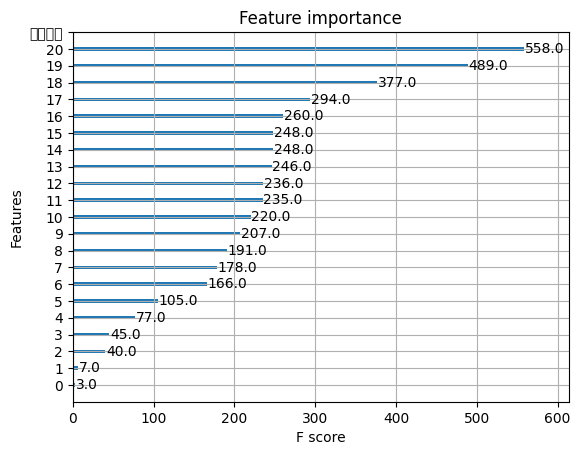

In [100]:
import matplotlib.pyplot as plt
plot_importance(model)
plt.yticks(range(22), X)
plt.show()

In [101]:
predictions = model.predict(x_test)
predictions

array([ 9.6551685e+00, -8.7675117e-02, -1.7196452e-03, ...,
        7.9300374e-02, -2.1055166e-01, -3.1155038e-03], dtype=float32)

In [102]:
y_pred = model.predict(x_test)
y_true = y_test

In [108]:
# MAE
mae = mean_absolute_error(y_true, y_pred)
print('MAE:{0: .2f}'.format(mae))
# 작을수록 좋음
# 평균적으로 0.51정도 잘못예측

MAE: 0.51


In [109]:
# MSE
mse = mean_squared_error(y_true, y_pred)
print('MSE:{0: .2f}'.format(mse))

# 평균적으로 2.5정도 잘못예측
# 작아야 좋음

MSE: 5.22


* 그래프

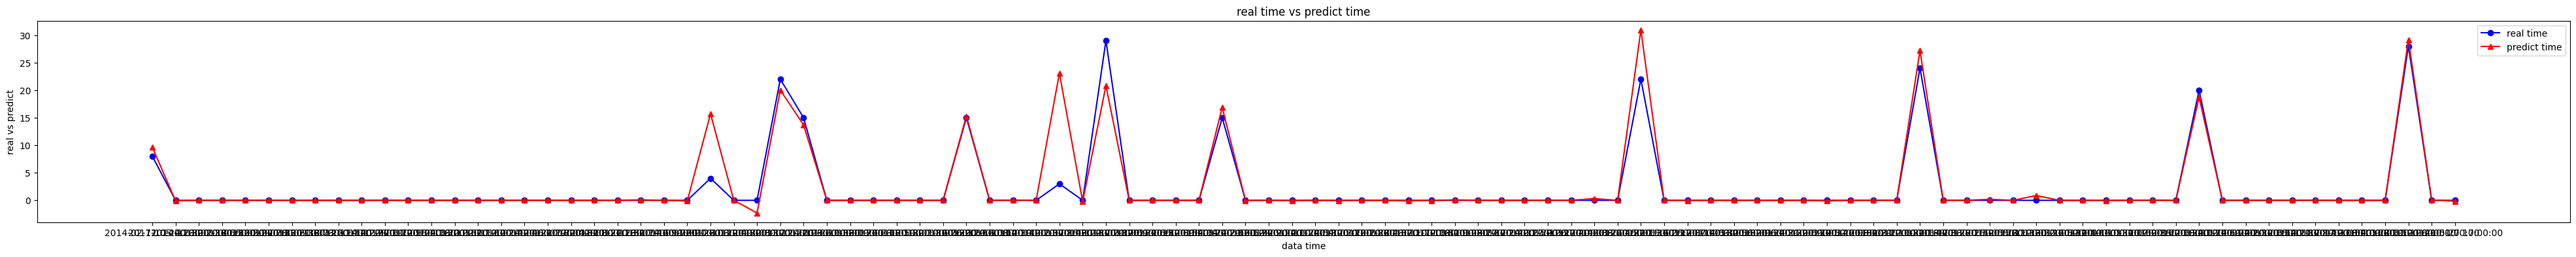

In [122]:
fig = plt.figure( figsize = (50, 4) )
chart = fig.add_subplot(1,1,1)
chart.plot(y_true[:100], marker='o', color='blue', label='real time')
chart.plot(y_pred[:100], marker='^', color='red', label='predict time')
chart.set_title('real time vs predict time')
plt.xlabel('data and time')
plt.ylabel('real vs predict')
plt.legend(loc = 'best') 

* 예측하기

In [110]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [111]:
dtrain = xgb.DMatrix(data=x_train, label = y_train)
dtest = xgb.DMatrix(data=x_test, label=y_test)

In [112]:
# max_depth = 3, 학습률은 0.1, 예제가 이진분류이므로 목적함수(objective)는 binary:logistic(이진 로지스틱)
# 오류함수의 평가성능지표는 logloss
# 부스팅 반복횟수는 400
# 조기중단을 위한 최소 반복횟수는 100

params = {'max_depth' : 3,
         'eta' : 0.1, 
         'objective' : 'binary:logistic',
         'eval_metric' : 'logloss',
         'early_stoppings' : 100 }

num_rounds = 400

In [113]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1, max_depth = 5, alpha = 10, n_estimators = 10)

In [115]:
xg_reg.fit(x_train,y_train)

[13:07:43] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.3,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=5, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=10, n_jobs=0,
             num_parallel_tree=1, objective='reg:linear', ...)

In [116]:
preds = xg_reg.predict(x_test)

In [120]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

#  RMSE가 낮으면 더 좋은 모델임
# 4.400010

RMSE: 4.400010
